In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


In [11]:
# Mount
from google.colab import drive
drive.mount('/content/drive')


# Load the data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

print(" Dataset Loaded Successfully!")
print(df.head())
print("\nColumns in dataset:", df.columns.tolist())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Dataset Loaded Successfully!
   Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...  

Columns in dataset: ['Class Index', 'Title', 'Description']


In [12]:
text_col = 'text'
label_col = 'label'

# missing value check
print(df.isnull().sum())


Class Index    0
Title          0
Description    0
dtype: int64


In [17]:
# Preprocess and vectorize text

text_col = 'Description'
label_col = 'Class Index'


df = df.dropna(subset=[text_col, label_col])

# label encode
le = LabelEncoder()
df[label_col] = le.fit_transform(df[label_col])

# text data tokenize
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df[text_col])
sequences = tokenizer.texts_to_sequences(df[text_col])

# padding
max_len = 100
X = pad_sequences(sequences, maxlen=max_len, padding='post')
y = np.array(df[label_col])

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" Preprocessing complete!")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])





✅ Preprocessing complete!
Training samples: 96000
Testing samples: 24000


In [27]:
# Build and Train ANN Model (Multi-Class Classification)

vocab_size = 5000
embedding_dim = 64
num_classes = len(df[label_col].unique())  # number of class

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # multi-class classification
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

print(model.summary())

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=8,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/8
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 57s 19ms/step - accuracy: 0.7357 - loss: 0.6312 - val_accuracy: 0.8957 - val_loss: 0.3055
Epoch 2/8
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 52s 17ms/step - accuracy: 0.9167 - loss: 0.2423 - val_accuracy: 0.8921 - val_loss: 0.3177
Epoch 3/8
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 56s 19ms/step - accuracy: 0.9509 - loss: 0.1420 - val_accuracy: 0.8846 - val_loss: 0.3943
Epoch 4/8
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 53s 18ms/step - accuracy: 0.9718 - loss: 0.0808 - val_accuracy: 0.8784 - val_loss: 0.5316
Epoch 5/8
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 55s 18ms/step - accuracy: 0.9833 - loss: 0.0507 - val_accuracy: 0.8777 - val_loss: 0.5787
Epoch 6/8
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 51s 17ms/step - accuracy: 0.9872 - loss: 0.0410 - val_accuracy: 0.8737 - val_loss: 0.6686
Epoch 7/8
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 53s 18ms/step - accuracy: 0.9892 - loss: 0.0343 - val_accuracy: 0.8731 - val_loss: 0.7122
Epoch 8/8
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 83s 18ms/step - accuracy: 0.9912 - lo

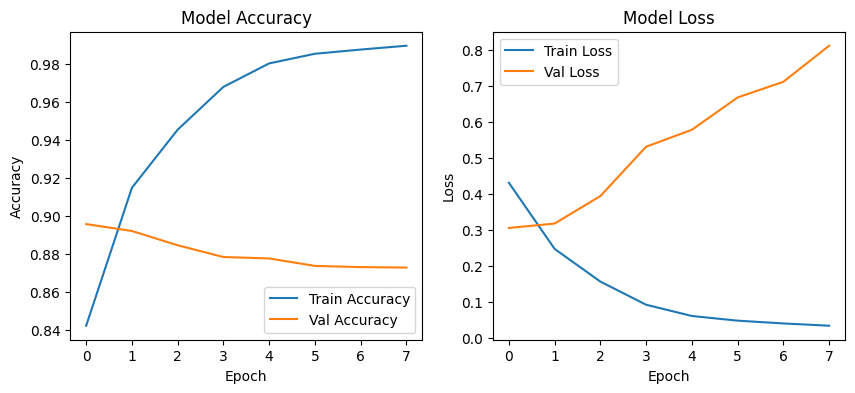

750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8782 - loss: 0.7731

✅ Final Test Accuracy: 87.29%


In [30]:
# Evaluate and Visualize Model Performance

# Accuracy and Loss Curves
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# Final evaluation
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Final Test Accuracy: {acc*100:.2f}%")
